# Problem Statement

 We are going to perform EDA on 1000 movies dataset provided by INSAID as a part of term 1 project


# Introduction

This dataset is a collection of details about 1,000 most popular movies on IMDB in the last 10 years (released in between 2006 - 2016).
My aim is to provide some insigh and in depth analysis of the data based on multiple factors.

# Dataset source
https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv

# Import package and load data in datarame


In [1]:
#!pip install -U pandas_profiling # Package required by pandas profiling

In [2]:

import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
import matplotlib.pyplot as plt
%matplotlib inline
#import pandas_profiling
import seaborn as sns

Movies_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv")
Movies_df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0


# Data profiling

We need to do data profiling in order to understand different data types in different columns, if there are any missing data or not and do we need to transform any variables in order to analyze it.  

In [3]:
Movies_df.dtypes

Rank                  int64  
Title                 object 
Genre                 object 
Description           object 
Director              object 
Actors                object 
Year                  int64  
Runtime (Minutes)     int64  
Rating                float64
Votes                 int64  
Revenue (Millions)    float64
Metascore             float64
dtype: object

In [4]:
Movies_df.describe(include="all")

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","After a threat from the tiger Shere Khan forces him to flee the jungle, a man-cub named Mowgli embarks on a journey of self discovery with the help of panther, Bagheera, and free spirited bear, Baloo.",Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [5]:
Movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [6]:
#Descriptive statistics of the numericals columns
Movies_df[['Rank','Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']].describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
Movies_df.describe(include = 'all') 

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi","After a threat from the tiger Shere Khan forces him to flee the jungle, a man-cub named Mowgli embarks on a journey of self discovery with the help of panther, Bagheera, and free spirited bear, Baloo.",Ridley Scott,"Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


# Observation 1
It seems there are total 12 columns available, out of which 7 are numerical and 5 are chategorical column. Usual number of data in each column is 1000,
    but Revenue and Metascore column has few null values (which needs to be analyzed further). Unique value in Title column showing 999 data, which means we have two movies with the same name. 

# Generate panda profile HTML and get a quick overview for all the variables

In [8]:
#Movies_profile = pandas_profiling.ProfileReport(Movies_df)
#Movies_profile.to_file(output_file="Movies_profile_before_preprocessing.html")

# Primary observations:

- <strong>Title</strong>: There are two movies with the same title "The host", rest are unique.
- <strong>Genre</strong>: It has 207 distinct count. This is because most of the movies falling into multiple Genres. We need to split the genre data into multiple columns.
- <strong>Director</strong>: There are 644 distinct counts, because some of the films have multiple directors and some directors are directed multiple films   
- <strong>Actors</strong>: It is a collection of lead actors of the movie. We need to split the genre data into multiple columns.
- <strong>Rating</strong>: Most of the movies are rated between 6 to 8 on a scale of 10.
- The following variables have null values and need to be analyzed further:
 - <strong>Revenue (Millions)</strong>:  There are 128 missing values (0.128% of the entire population). Either the data is not available, or else the movie didnt collect any revenue.
 - <strong>Metascore</strong>: There are 64 missing values (0.064% of the entire population). It is very much possible that these movies were not reviewed by that many critics. This column seems to be an optional column.

# Data Normaization


# 1. Split the actors and genre

In [9]:
Actors_df = Movies_df['Actors'].str.split(',', expand=True).rename(columns=lambda x: f"Actor-{x+1}")
movies1 = pd.concat([Movies_df, Actors_df], axis=1, sort=False)
genre_df = movies1['Genre'].str.split(',', expand=True).rename(columns=lambda x: f"Genre-{x+1}")
movies1 = pd.concat([movies1, genre_df], axis=1, sort=False)
movies1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor-1,Actor-2,Actor-3,Actor-4,Genre-1,Genre-2,Genre-3
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,Action,Adventure,Sci-Fi
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,Adventure,Mystery,Sci-Fi
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,Horror,Thriller,None
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,Animation,Comedy,Family
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0,Will Smith,Jared Leto,Margot Robbie,Viola Davis,Action,Adventure,Fantasy
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,Action,Adventure,Fantasy
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress in Los Angeles.,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J.K. Simmons",2016,128,8.3,258682,151.06,93.0,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,Comedy,Drama,Music
7,8,Mindhorn,Comedy,"A has-been actor best known for playing the title character in the 1980s detective series ""Mindhorn"" must work with the police when a serial killer says that he will only speak with Detective Mindhorn, whom he believes to be a real person.",Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barratt,Kenneth Branagh",2016,89,6.4,2490,NaN,71.0,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh,Comedy,None,None
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explorer Col. Percival Fawcett, who disappeared while searching for a mysterious city in the Amazon in the 1920s.",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Miller, Tom Holland",2016,141,7.1,7188,8.01,78.0,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland,Action,Adventure,Biography
9,10,Passengers,"Adventure,Drama,Romance","A spacecraft traveling to a distant colony planet and transporting thousands of people has a malfunction in its sleep chambers. As a result, two passengers are awakened 90 years early.",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,Laurence Fishburne",2016,116,7.0,192177,100.01,41.0,Jennifer Lawrenc

# 2.Deal with missing data and drop columns
Since description column does not seem very important for the analysis, so we can drop it for simplicity. Also, we already split Genre and Actors column into seperate categorical column, so we can drop those two original column and create a new data frame.

In [10]:
movies_new = movies1.drop(['Description'], axis= 1)
movies_new = movies1.drop(['Actors'], axis= 1)
movies_new = movies1.drop(['Genre'], axis= 1)
movies_new.head(10)
#movies_new.describe(include="all")

,Rank,Title,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor-1,Actor-2,Actor-3,Actor-4,Genre-1,Genre-2,Genre-3
0,1,Guardians of the Galaxy,A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0,Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana,Action,Adventure,Sci-Fi
1,2,Prometheus,"Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0,Noomi Rapace,Logan Marshall-Green,Michael Fassbender,Charlize Theron,Adventure,Mystery,Sci-Fi
2,3,Split,Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0,James McAvoy,Anya Taylor-Joy,Haley Lu Richardson,Jessica Sula,Horror,Thriller,None
3,4,Sing,"In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0,Matthew McConaughey,Reese Witherspoon,Seth MacFarlane,Scarlett Johansson,Animation,Comedy,Family
4,5,Suicide Squad,A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0,Will Smith,Jared Leto,Margot Robbie,Viola Davis,Action,Adventure,Fantasy
5,6,The Great Wall,European mercenaries searching for black powder become embroiled in the defense of the Great Wall of China against a horde of monstrous creatures.,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Matt Damon,Tian Jing,Willem Dafoe,Andy Lau,Action,Adventure,Fantasy
6,7,La La Land,A jazz pianist falls for an aspiring actress in Los Angeles.,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J.K. Simmons",2016,128,8.3,258682,151.06,93.0,Ryan Gosling,Emma Stone,Rosemarie DeWitt,J.K. Simmons,Comedy,Drama,Music
7,8,Mindhorn,"A has-been actor best known for playing the title character in the 1980s detective series ""Mindhorn"" must work with the police when a serial killer says that he will only speak with Detective Mindhorn, whom he believes to be a real person.",Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barratt,Kenneth Branagh",2016,89,6.4,2490,NaN,71.0,Essie Davis,Andrea Riseborough,Julian Barratt,Kenneth Branagh,Comedy,None,None
8,9,The Lost City of Z,"A true-life drama, centering on British explorer Col. Percival Fawcett, who disappeared while searching for a mysterious city in the Amazon in the 1920s.",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Miller, Tom Holland",2016,141,7.1,7188,8.01,78.0,Charlie Hunnam,Robert Pattinson,Sienna Miller,Tom Holland,Action,Adventure,Biography
9,10,Passengers,"A spacecraft traveling to a distant colony planet and transporting thousands of people has a malfunction in its sleep chambers. As a result, two passengers are awakened 90 years early.",Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,Laurence Fishburne",2016,116,7.0,192177,100.01,41.0,Jennifer Lawrence,Chris Pratt,Michael Sheen,Laurence Fishburne,Adventure,Drama,Romance


# 3.Group movies based on Genre distribution for further analysis


In [11]:
genres_unique = pd.concat([movies_new['Genre-1'], movies_new['Genre-2'], movies_new['Genre-3']]).unique()
genres_unique = genres_unique[genres_unique != None]
print (genres_unique)
print (len(genres_unique))

['Action' 'Adventure' 'Horror' 'Animation' 'Comedy' 'Biography' 'Drama'
 'Crime' 'Romance' 'Mystery' 'Thriller' 'Sci-Fi' 'Fantasy' 'Family'
 'History' 'Music' 'Western' 'War' 'Musical' 'Sport']
20


# 4.Genre distribution and plot bar chart

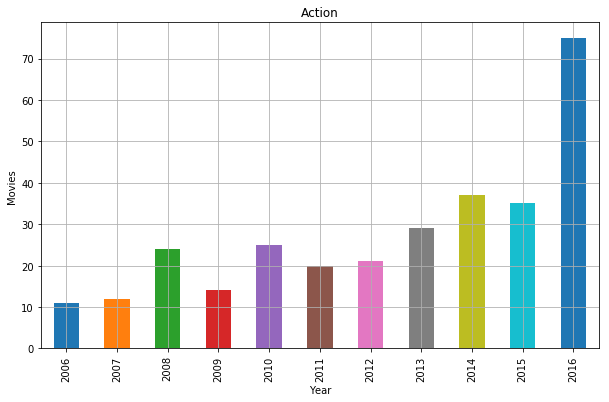

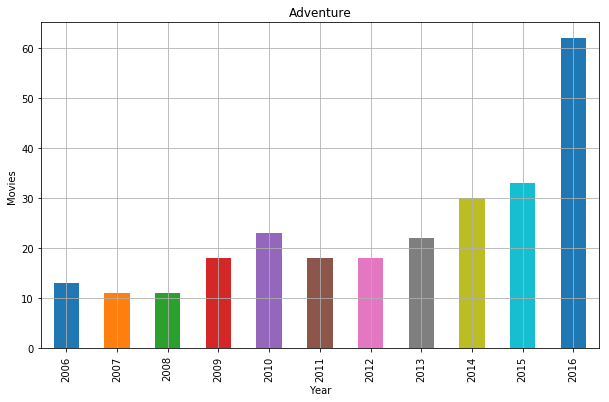

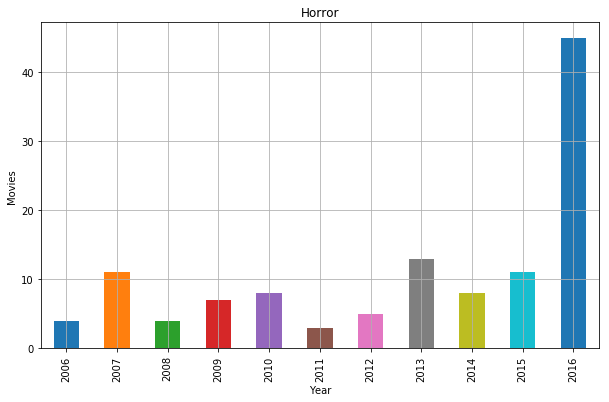

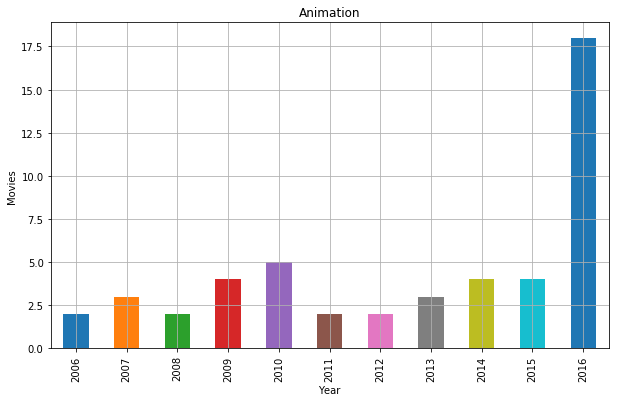

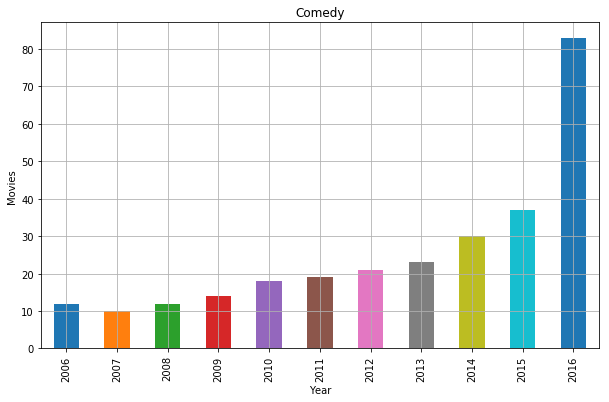

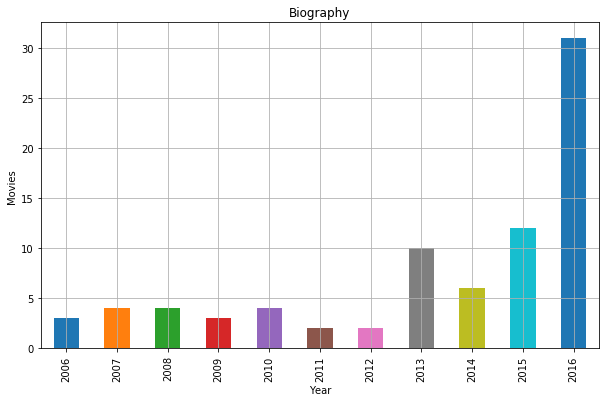

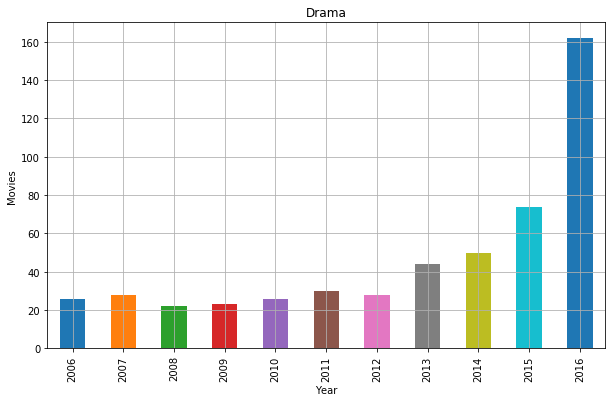

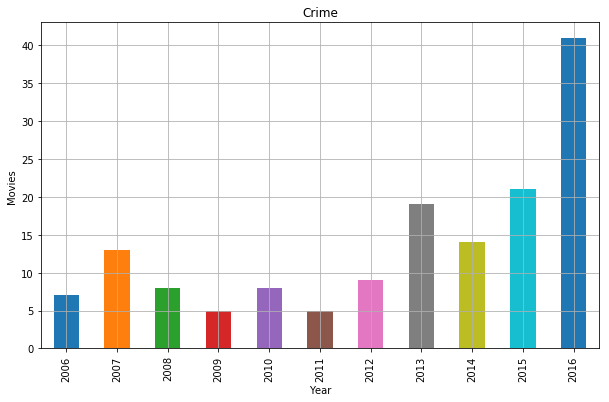

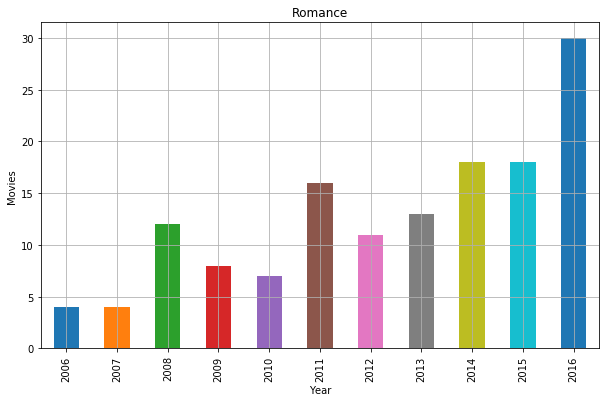

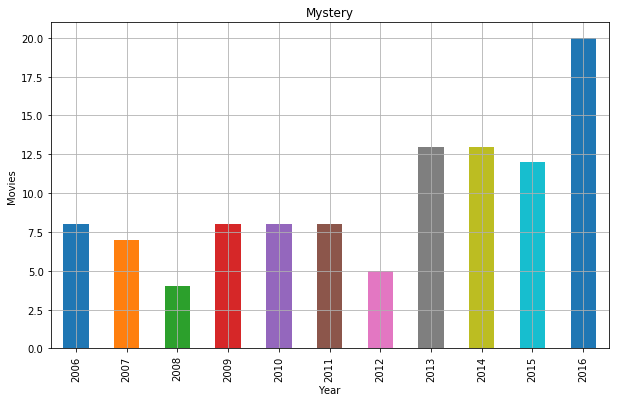

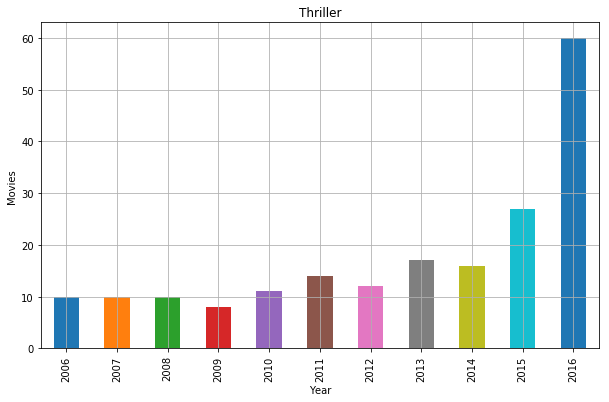

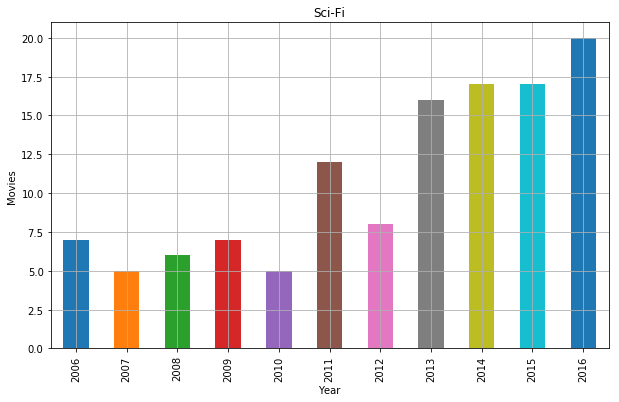

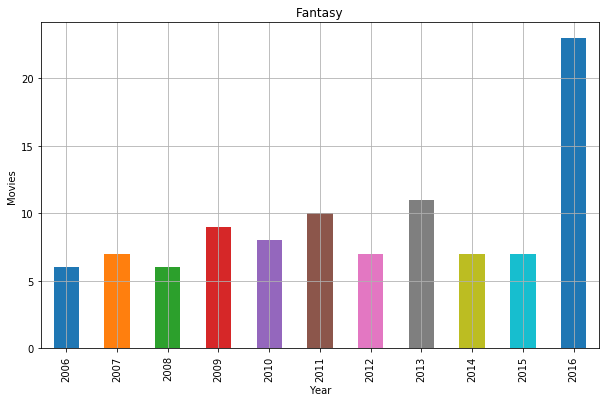

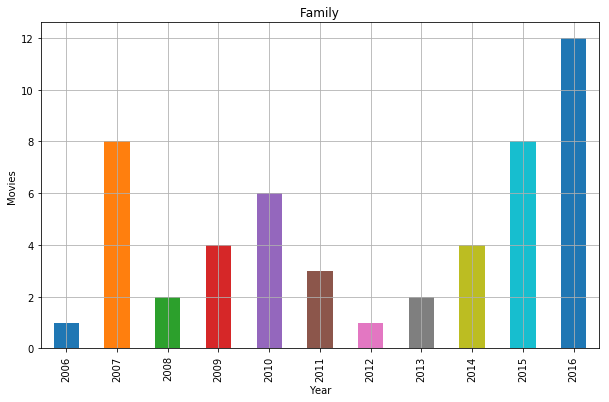

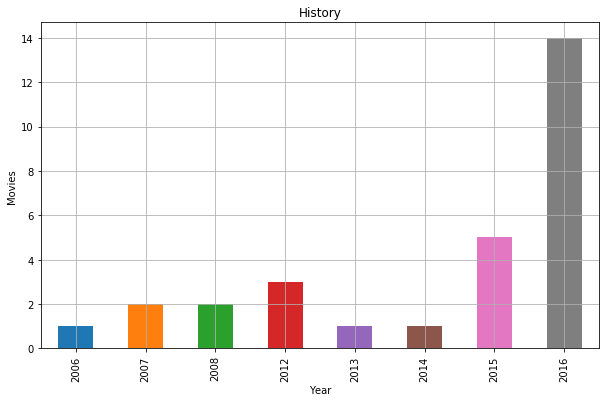

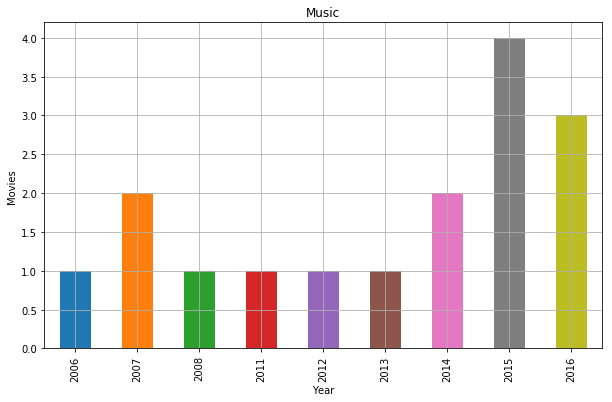

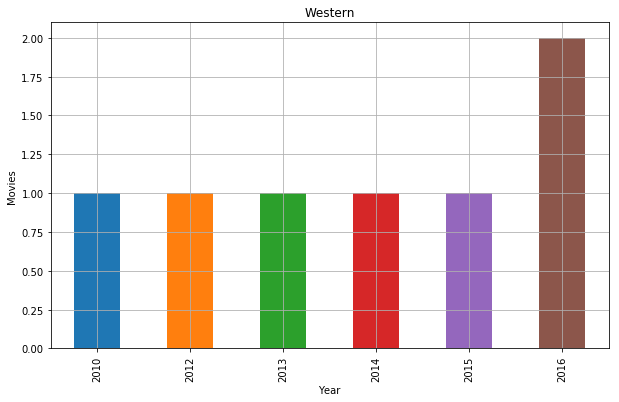

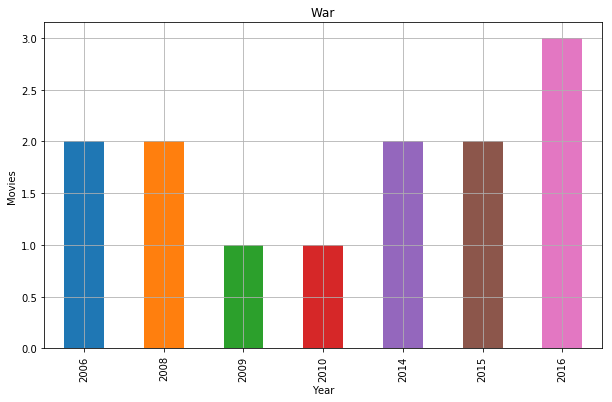

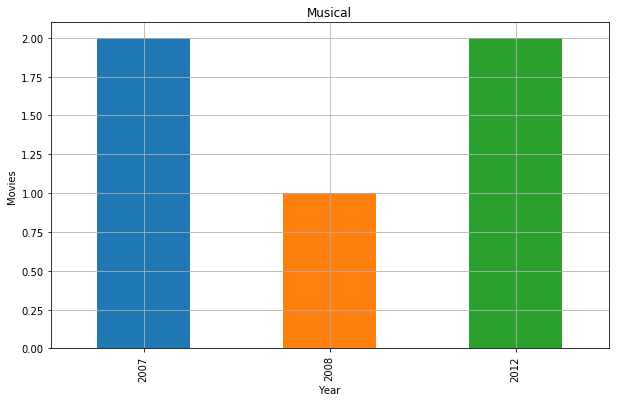

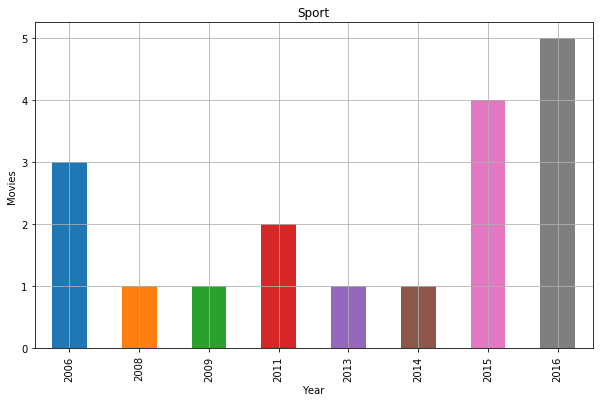

In [12]:
movieCount = np.zeros(len(list(genres_unique)))
i = 0
for genre in genres_unique:
    current_genre = (movies_new['Genre-1'] == genre) | (movies_new['Genre-2'] == genre) | (movies_new['Genre-3'] == genre)
    plt.figure()
    plt.xlabel('Year')
    plt.ylabel('Movies')
    plt.title(str(genre))
    movies_new[current_genre].Year.value_counts().sort_index().plot.bar(figsize=(10,6),grid=True)
    movieCount[i] = len(movies_new[current_genre])
    i += 1

In [13]:
# Movie count for every individual genre
print (movieCount)

genre_df = pd.DataFrame(movieCount, index=genres_unique, columns=['MovieCount'])
genre_df

[303. 259. 119.  49. 279.  81. 513. 150. 141. 106. 195. 120. 101.  51.
  29.  16.   7.  13.   5.  18.]


,MovieCount
Action,303.0
Adventure,259.0
Horror,119.0
Animation,49.0
Comedy,279.0
Biography,81.0
Drama,513.0
Crime,150.0
Romance,141.0
Mystery,106.0


Text(0.5, 1.0, 'Top 5 Genres movie count')

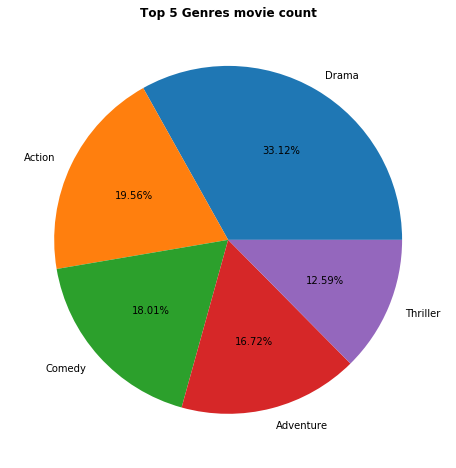

In [14]:
#Top 5 genre movie count
genre_df.sort_values(by='MovieCount', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Top 5 Genres movie count', weight='bold')

Text(0.5, 1.0, 'Total Movies - Bottom 5 Genres')

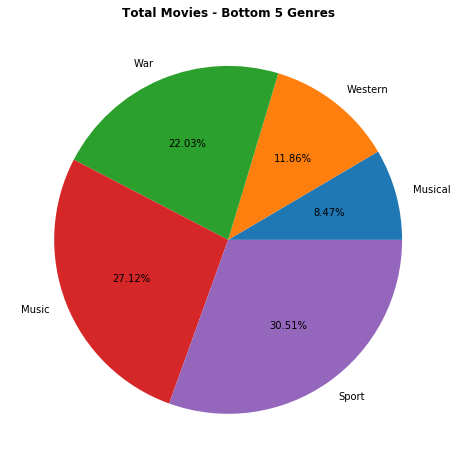

In [15]:
#Bottom 5 genre movie count
genre_df.sort_values(by='MovieCount', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Total Movies - Bottom 5 Genres', weight='bold')

##### Observation1
It's pretty clear that Drama, Action, Comedy, Adventure and Thriller are the top 5 genre where most number of movies are made. We need to check other 
factors (revenue/popularity/rating etc) behind the reason of their superiocity. Where as Sports, Music, War, Western and Musical are bottom 5 genre.

# 5. Find out relationship netween genre and revenue

In [16]:
genre_revenue = np.zeros(len(genres_unique))
i = 0
for genre in genres_unique:
    current_genre = (movies_new['Genre-1'] == genre) | (movies_new['Genre-2'] == genre) | (movies_new['Genre-3'] == genre)
    genre_revenue[i] = movies_new[current_genre].xs('Revenue (Millions)', axis=1).sum() / movies_new['Revenue (Millions)'].sum() * 100
    i += 1

genre_revenue_df = pd.DataFrame(genre_revenue, index=genres_unique, columns=['Revenue Share'])
genre_revenue_df

,Revenue Share
Action,49.220935
Adventure,53.709850
Horror,4.718947
Animation,12.424321
Comedy,26.703062
Biography,5.785510
Drama,30.318038
Crime,11.107059
Romance,7.579547
Mystery,6.721036


Text(0.5, 1.0, 'Revenue Split Top 5 Genres')

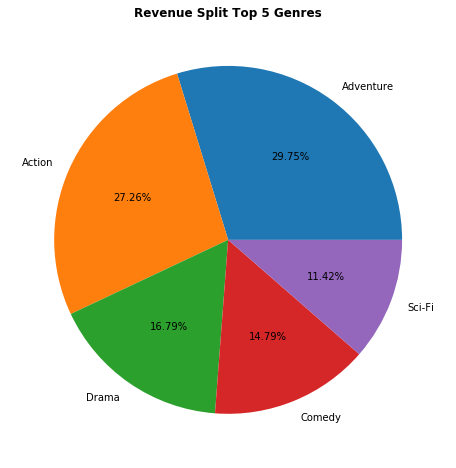

In [17]:
# Revenue split top 5 genre
genre_revenue_df.sort_values(by='Revenue Share', ascending=False).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Revenue Split Top 5 Genres', weight='bold')

Text(0.5, 1.0, 'Revenue split bottom 5 genre')

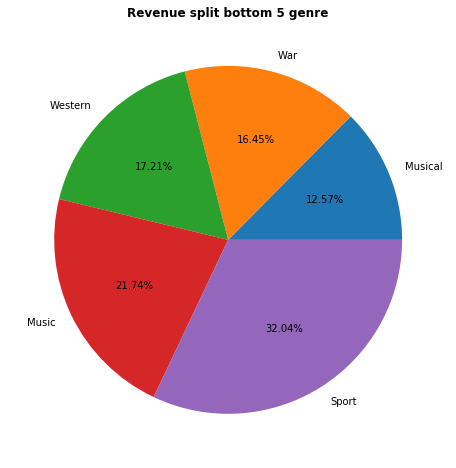

In [18]:
# Revenue split bottom 5 genre
genre_revenue_df.sort_values(by='Revenue Share', ascending=True).head(5).plot.pie(legend=False, subplots=True, autopct='%.2f%%', figsize=(8,8))
plt.ylabel('')
plt.title('Revenue split bottom 5 genre', weight='bold')

#### Observation2
As stated in previous observation1 (most populat genre based on number of movies), it's pretty clear that Adventure, Action, Drama, Comedy, Thriller, Sci-fi
type of movies generate more revenues and hence those movies are produced in a greater number each year. As usual Sports, Music, War, Western and Musical 
generate least revenue.


# 6.Find out relationship between genre and rating

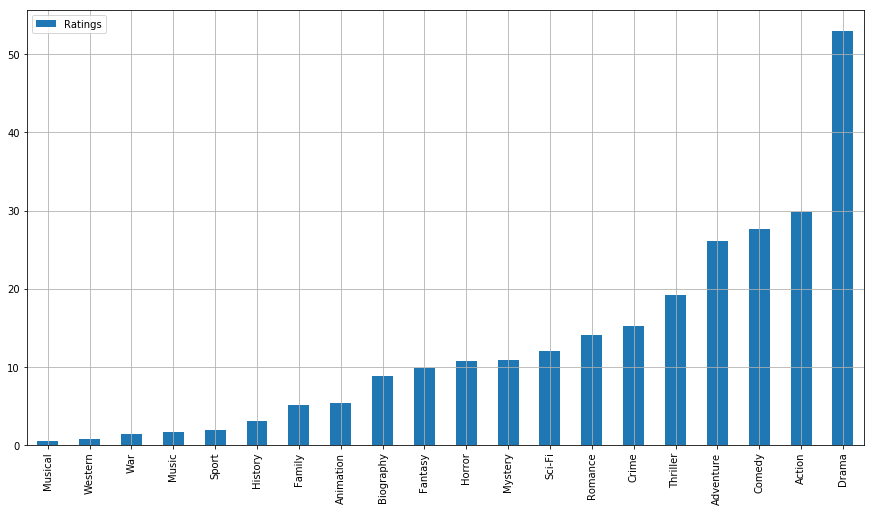

In [19]:
genre_ratings = np.zeros(len(list(genres_unique)))
i = 0
for genre in genres_unique:
    current_genre = (movies_new['Genre-1'] == genre) | (movies_new['Genre-2'] == genre) | (movies_new['Genre-3'] == genre)
    genre_ratings[i] = movies_new[current_genre].xs('Rating', axis=1).sum() / movies_new['Rating'].sum() * 100
    i += 1
genre_ratings_df = pd.DataFrame(genre_ratings, index=genres_unique, columns=['Ratings'])
genre_ratings_df.sort_values(by='Ratings').plot.bar(figsize=(15,8),grid=True)

#### Observation3
Drama tops the chart in terms of rating, followed by Action/Comedy/Adventure/Thriller. So these popular genre movies are produced more every year,
liked by most number of people and generate more revenue. 

# 7.Pandas profiling post data manipulation

In [20]:
#post_profile = pandas_profiling.ProfileReport(movies_new)
#post_profile.to_file(output_file="Movies_profile_after_postprocessing.html")

In [21]:
#Create a copy of "movies_new" dataframe and do a level encoding on Categorical variables to find correlation

In [22]:
movies_new1 = movies_new.copy(deep=True)
from sklearn.preprocessing import LabelEncoder                                    
number = LabelEncoder()                                                           
for i in movies_new1.columns:                                                          
    movies_new1[i] = number.fit_transform(movies_new1[i].astype('str'))
movies_new1

,Rank,Title,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Actor-1,Actor-2,Actor-3,Actor-4,Genre-1,Genre-2,Genre-3
0,0,287,110,265,184,8,21,47,893,463,61,94,666,99,597,0,1,14
1,112,568,538,518,736,6,24,36,701,135,50,391,412,516,105,1,12,14
2,223,655,880,391,418,10,17,39,191,167,47,221,51,274,279,8,17,12
3,334,635,613,105,658,10,8,38,804,387,44,347,691,667,520,2,3,5
4,445,673,220,136,971,10,23,28,617,456,25,514,274,478,582,0,1,6
5,556,779,519,640,649,10,3,27,773,567,27,345,644,749,38,0,1,6
6,667,402,134,122,809,10,28,49,419,205,78,437,196,633,237,4,5,9
7,778,470,121,558,313,10,83,30,401,814,56,160,30,397,764,4,13,12
8,889,832,278,264,153,10,41,37,868,747,63,85,559,674,570,0,1,1
9,1,538,240,448,455,10,16,36,272,69,26,240,121,523,771,1,5,13


In [23]:
#Find Correlation
corr=movies_new1.corr()['Rank']
corr[np.argsort(corr,axis=0)[::-1]]

Rank                  1.000000
Genre-1               0.114268
Actors                0.089848
Actor-1               0.089588
Genre-2               0.080866
Revenue (Millions)    0.075228
Runtime (Minutes)     0.062713
Title                 0.037851
Director              0.036205
Genre-3               0.033176
Actor-3               0.024030
Actor-4               0.001435
Description          -0.027138
Actor-2              -0.032162
Votes                -0.048850
Metascore            -0.124285
Rating               -0.159026
Year                 -0.184708
Name: Rank, dtype: float64

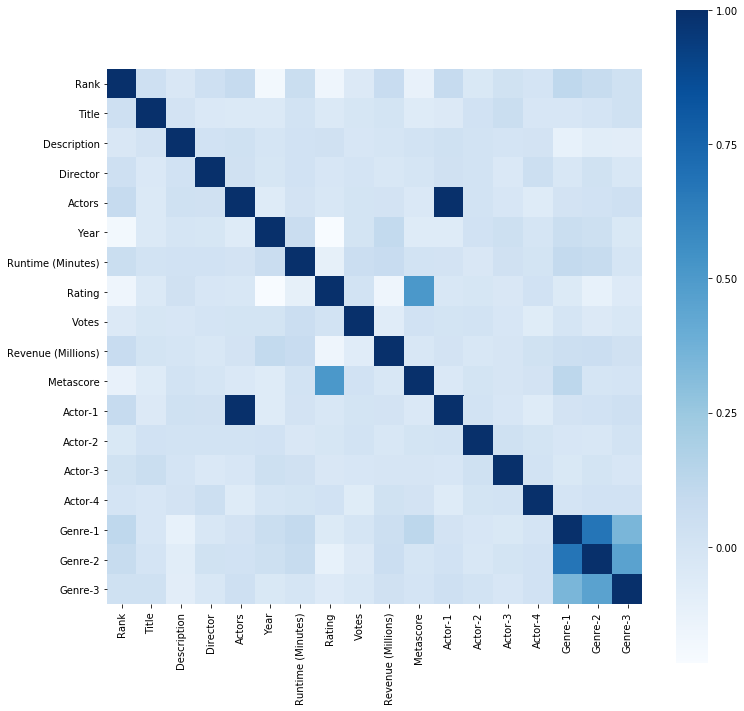

In [24]:
#hitmap
features_correlation = movies_new1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

#### Observation4
Data contains both numerical and categorical columns. In order to find a correlation between all the columns, level encoding is introduced.
From the hitmap, we can derive following observations:
1)	Metascore and Rating has a highly positive correlation.
2)	All the individual genres have high positive correlation between them
3)	Surprisingly, revenue and rating does not have any correlation, which means a critically acclaimed movie might not generate high revenue and vice versa. 
    Similarly revenue has a weak correlation with metascore and votes.
4)	Rest of the categories seems to have weak correlation.


# 8. Pattern analysis in the data

# i) Movies produced per year

Text(0.5, 1.0, 'Movie Count Year Wise')

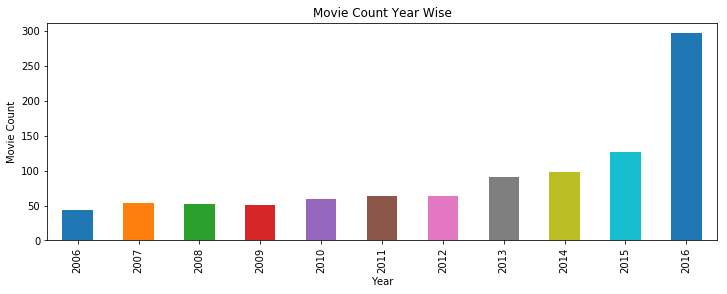

In [25]:
movie_yearly_count = movies_new['Year'].value_counts().sort_index().plot.bar(figsize=(12,4))
movie_yearly_count.set_xlabel('Year')
movie_yearly_count.set_ylabel('Movie Count')
movie_yearly_count.set_title('Movie Count Year Wise')

#### Observation5
Number of movie produced is getting increased every year. From 2006 till 2012 it was a steady number (50 and a bit above), 2013 onwards the numbers
are increased drastically. But there is a sudden jump in movie numbers from 2015 to 2016 (almost double). Probably it indicates the website is getting
popular and more movie data is getting recorded 2013 onwards.

# ii)Rating of movies

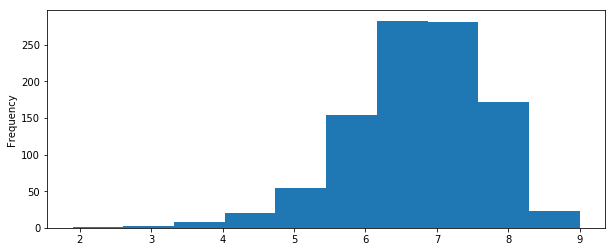

In [26]:
movies_new['Rating'].plot.hist(figsize=(10,4))    

#### Observation6
Most of the movies fall between average rating 6 to 8, which can be termed as decent movies.

# iii) Top actors (w.r.to count of the movies acted in)

['Chris Pratt' 'Noomi Rapace' 'James McAvoy' ... ' Adam G. Sevani'
 'Shannon Woodward' 'Cheryl Hines']
2394
[3. 2. 5. ... 1. 1. 1.]


Text(0.5, 1.0, 'Total Movies - Top 5 Actors')

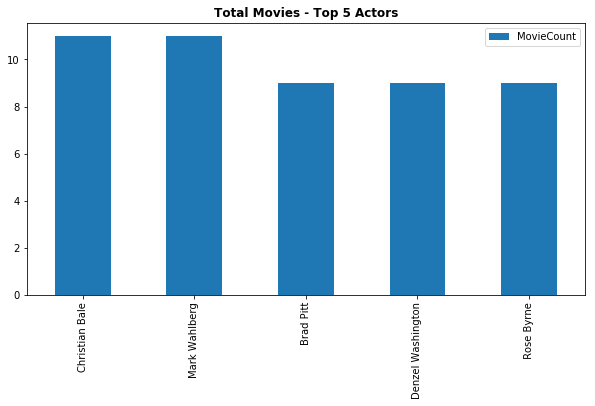

In [27]:
unique_actors = pd.concat([movies_new['Actor-1'], movies_new['Actor-2'], movies_new['Actor-3'], movies_new['Actor-4']]).unique()
unique_actors = unique_actors[unique_actors != None]
print (unique_actors)
print (len(unique_actors))

actor_movieCount = np.zeros(len(list(unique_actors)))
i = 0
for actor in unique_actors:
    current_actor = (movies_new['Actor-1'] == actor) | (movies_new['Actor-2'] == actor) | (movies_new['Actor-3'] == actor) | (movies_new['Actor-4'] == actor)
    actor_movieCount[i] = len(movies_new[current_actor])
    i += 1
print (actor_movieCount)

actor_df = pd.DataFrame(actor_movieCount, index=unique_actors, columns=['MovieCount'])
actor_df.sort_values(by='MovieCount', ascending=False).head(5).plot.bar(figsize=(10,5))
plt.ylabel('')
plt.title('Total Movies - Top 5 Actors', weight='bold')

# iv) Top actors (w.r.to box office)

[1243.07  126.46  442.21 ...    0.      0.      0.  ]
                   Revenue (Millions)
Robert Downey Jr.  2564.58           
Jennifer Lawrence  1607.87           
Christian Bale     1559.62           
 Josh Hutcherson   1451.42           
Will Smith         1340.28           


Text(0.5, 1.0, 'Revenue Collection - Top 5 Actors')

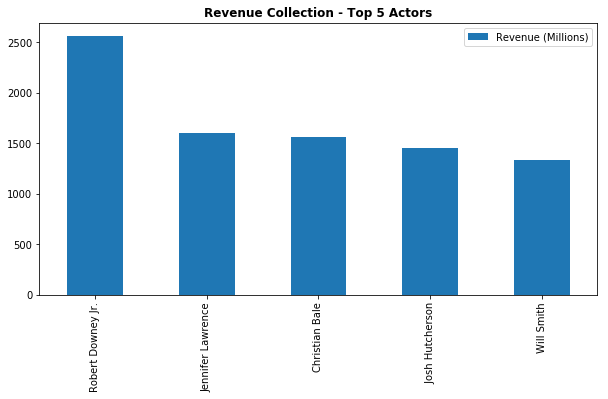

In [28]:
actor_RevenueCount = np.zeros(len(list(unique_actors)))
i = 0
for actor in unique_actors:
    current_actor = (movies_new['Actor-1'] == actor)  | (movies_new['Actor-2'] == actor)
    actor_RevenueCount[i] = movies_new[current_actor].xs('Revenue (Millions)', axis=1).sum() 
    i += 1
print (actor_RevenueCount)
#print (actor_RevenueCount)
actor_revenue_df = pd.DataFrame(actor_RevenueCount, index=unique_actors, columns=['Revenue (Millions)'])
print(actor_revenue_df.sort_values(by='Revenue (Millions)', ascending=False).head(5))
actor_revenue_df.sort_values(by='Revenue (Millions)', ascending=False).head(5).plot.bar(figsize=(10,5))
plt.ylabel('')
plt.title('Revenue Collection - Top 5 Actors', weight='bold')

#### Observation7
It seems movie count wise top actors does not necessarily top the box office.

# v) Rating vs Year

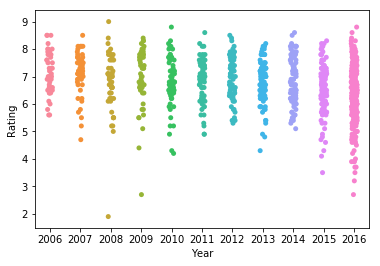

In [29]:
sns.stripplot(x="Year", y="Rating", data=movies_new, jitter=True)

#### Observation8
2015 and 2016 has more number of rated movies

# vi) Year vs Votes

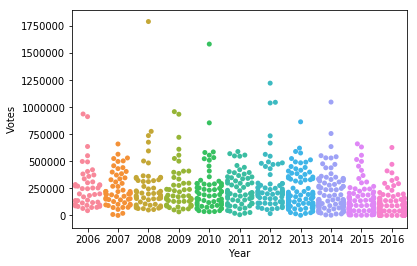

In [30]:
sns.swarmplot(x="Year", y="Votes", data=movies_new)

#### Observation9
Number of votes are increased every year

# vii) Various plots involving directors

Ridley Scott          8
M. Night Shyamalan    6
David Yates           6
Michael Bay           6
Paul W.S. Anderson    6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Martin Scorsese       5
Antoine Fuqua         5
Name: Director, dtype: int64


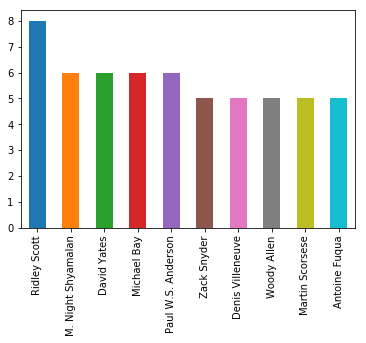

In [31]:
print(movies_new.Director.value_counts()[:10])
movies_new.Director.value_counts()[:10].plot.bar(legend=False)

                   Revenue (Millions)
J.J. Abrams        1683.45           
David Yates        1630.51           
Christopher Nolan  1515.09           
Michael Bay        1421.32           
Francis Lawrence   1299.81           


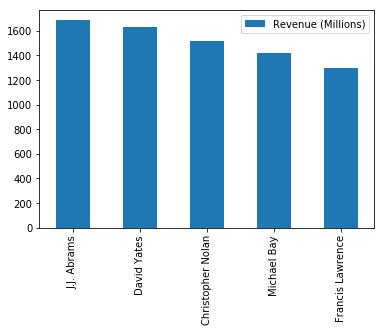

In [32]:
#Revenue wise top director count
unique_directors = movies_new.Director.unique()
director_RevenueCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies_new['Director'] == direc)
    director_RevenueCount[i] = movies_new[current_director].xs('Revenue (Millions)', axis=1).sum() 
    i += 1
director_revenue_df = pd.DataFrame(director_RevenueCount, index=unique_directors, columns=['Revenue (Millions)'])
print(director_revenue_df.sort_values(by='Revenue (Millions)', ascending=False).head(5))
director_revenue_df.sort_values(by='Revenue (Millions)', ascending=False).head(5).plot.bar()

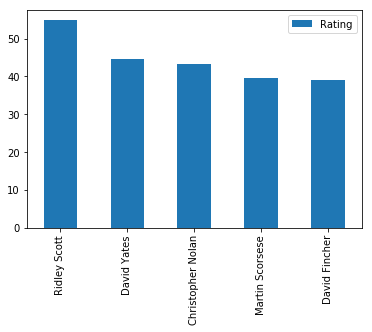

In [33]:
#Top directors w.r.to. rating
director_ratingCount = np.zeros(len(list(unique_directors)))
i = 0
for direc in unique_directors:
    current_director = (movies_new['Director'] == direc)
    director_ratingCount[i] = movies_new[current_director].xs('Rating', axis=1).sum() 
    i += 1
director_rating_df = pd.DataFrame(director_ratingCount, index=unique_directors, columns=['Rating'])
director_rating_df.sort_values(by='Rating', ascending=False).head(5).plot.bar()

# viii) Runtime vs. Rating

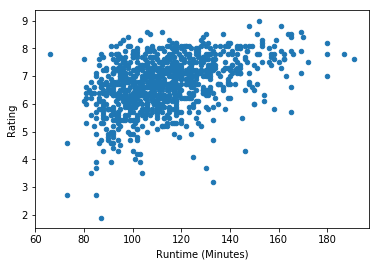

In [34]:
f = movies_new.sort_values(by='Rating', ascending=False)
f.plot.scatter(x='Runtime (Minutes)', y='Rating')

#### Observation10
Most of the average rated movies (6 to 8) have a runtime between 90 to 120

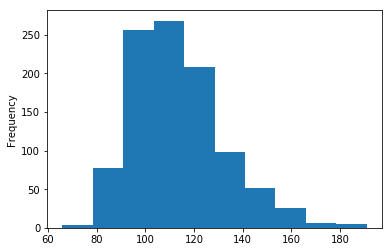

In [35]:
movies_new['Runtime (Minutes)'].plot.hist()

#### Observation11
Maximum movies fall between 90 to 120 minutes runtime

# ix) Plot vote, revenue amd metascore separately

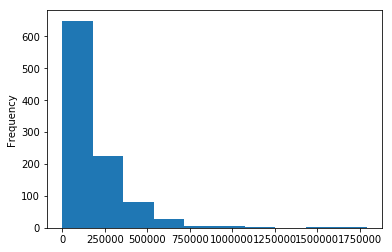

In [36]:
# Plot vote
movies_new['Votes'].plot.hist()

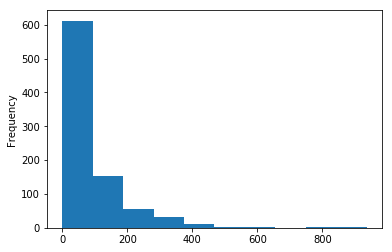

In [37]:
#Plot revenue
movies_new['Revenue (Millions)'].plot.hist()

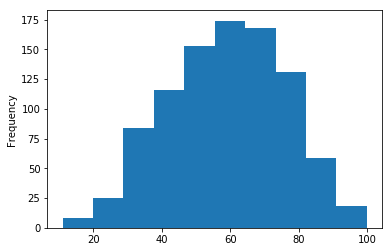

In [38]:
#Plot metascore
movies_new['Metascore'].plot.hist()

# 9. Important points 

### A. Top 10 movies
It's a bit difficult to choose top 10 movies due to multiple deciding factor, so top movies can vary based on revenue, rating and votes.

#### i) Top movie w.r.to revenue

In [39]:
movies_new.sort_values(by='Revenue (Millions)', ascending=False).head(10)[['Title','Director', 'Revenue (Millions)', 'Rating', 'Genre-1']]

,Title,Director,Revenue (Millions),Rating,Genre-1
50,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,936.63,8.1,Action
87,Avatar,James Cameron,760.51,7.8,Action
85,Jurassic World,Colin Trevorrow,652.18,7.0,Action
76,The Avengers,Joss Whedon,623.28,8.1,Action
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action
12,Rogue One,Gareth Edwards,532.17,7.9,Action
119,Finding Dory,Andrew Stanton,486.29,7.4,Animation
94,Avengers: Age of Ultron,Joss Whedon,458.99,7.4,Action
124,The Dark Knight Rises,Christopher Nolan,448.13,8.5,Action
578,The Hunger Games: Catching Fire,Francis Lawrence,424.65,7.6,Action


#### ii) Top movie w.r.to rating

In [40]:
movies_new.sort_values(by='Rating', ascending=False).head(10)[['Title','Director', 'Revenue (Millions)', 'Rating', 'Genre-1']]

,Title,Director,Revenue (Millions),Rating,Genre-1
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action
80,Inception,Christopher Nolan,292.57,8.8,Action
117,Dangal,Nitesh Tiwari,11.15,8.8,Action
36,Interstellar,Christopher Nolan,187.99,8.6,Adventure
96,Kimi no na wa,Makoto Shinkai,4.68,8.6,Animation
249,The Intouchables,Olivier Nakache,13.18,8.6,Biography
133,Whiplash,Damien Chazelle,13.09,8.5,Drama
64,The Prestige,Christopher Nolan,53.08,8.5,Drama
99,The Departed,Martin Scorsese,132.37,8.5,Crime
991,Taare Zameen Par,Aamir Khan,1.20,8.5,Drama


#### iii)Top movie w.r.to votes cast

In [41]:
movies_new.sort_values(by='Votes', ascending=False).head(10)[['Title','Director', 'Revenue (Millions)', 'Rating', 'Genre-1']]

,Title,Director,Revenue (Millions),Rating,Genre-1
54,The Dark Knight,Christopher Nolan,533.32,9.0,Action
80,Inception,Christopher Nolan,292.57,8.8,Action
124,The Dark Knight Rises,Christopher Nolan,448.13,8.5,Action
36,Interstellar,Christopher Nolan,187.99,8.6,Adventure
76,The Avengers,Joss Whedon,623.28,8.1,Action
144,Django Unchained,Quentin Tarantino,162.80,8.4,Drama
77,Inglourious Basterds,Quentin Tarantino,120.52,8.3,Adventure
99,The Departed,Martin Scorsese,132.37,8.5,Crime
87,Avatar,James Cameron,760.51,7.8,Action
64,The Prestige,Christopher Nolan,53.08,8.5,Drama


#### iv) Movies with low rating but high revenue

In [42]:
movies_new.sort_values(by='Revenue (Millions)', ascending=False).head(10)[['Title','Director', 'Revenue (Millions)', 'Rating', 'Genre-1']][movies_new['Rating'] < 6]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Title,Director,Revenue (Millions),Rating,Genre-1


###### No movie satisfy this criterion

#### v) Highly rated movies with less than expected revenue

In [43]:
movies_new.sort_values(by='Rating', ascending=False).head(10)[['Title','Director', 'Revenue (Millions)', 'Rating', 'Genre-1']][movies_new['Revenue (Millions)'] < movies_new['Revenue (Millions)'].mean()]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Title,Director,Revenue (Millions),Rating,Genre-1
117,Dangal,Nitesh Tiwari,11.15,8.8,Action
96,Kimi no na wa,Makoto Shinkai,4.68,8.6,Animation
249,The Intouchables,Olivier Nakache,13.18,8.6,Biography
133,Whiplash,Damien Chazelle,13.09,8.5,Drama
64,The Prestige,Christopher Nolan,53.08,8.5,Drama
991,Taare Zameen Par,Aamir Khan,1.20,8.5,Drama


# B) Rating, revenue, runtime trend over the years

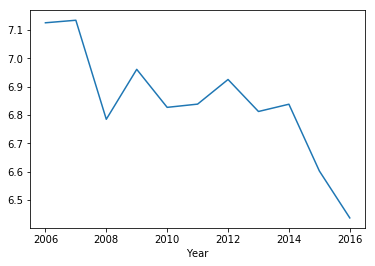

In [44]:
yearMov = movies_new.groupby('Year')
yearMov.mean()['Rating'].plot.line()

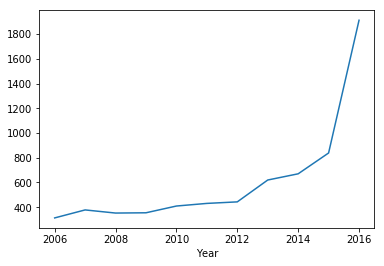

In [45]:
yearMov.sum()['Rating'].plot.line()

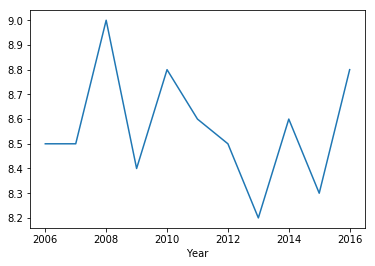

In [46]:
yearMov['Rating'].max().plot.line()

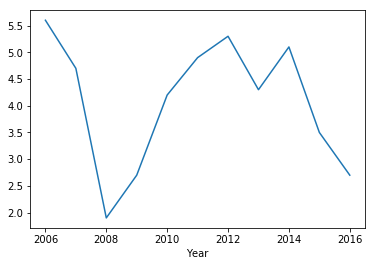

In [47]:
yearMov['Rating'].min().plot.line()

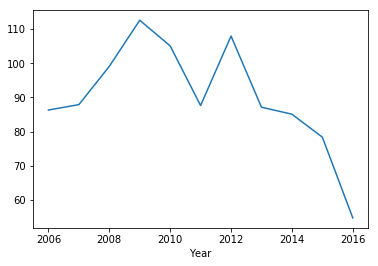

In [48]:
yearMov.mean()['Revenue (Millions)'].plot.line()

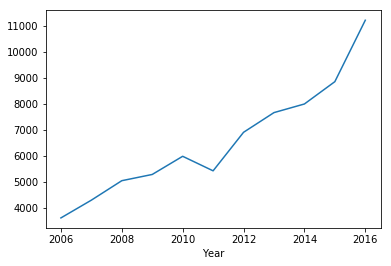

In [49]:
yearMov.sum()['Revenue (Millions)'].plot.line()

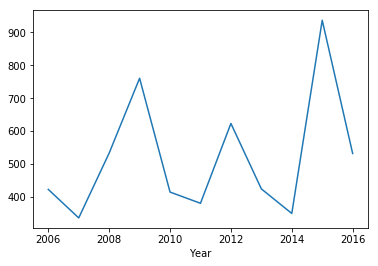

In [50]:
yearMov['Revenue (Millions)'].max().plot.line()

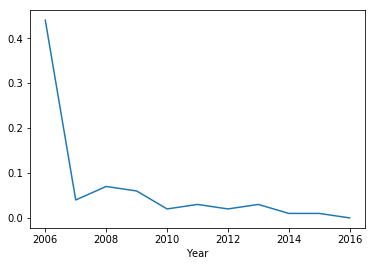

In [51]:
yearMov['Revenue (Millions)'].min().plot.line()

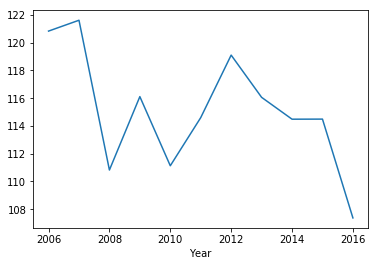

In [52]:
yearMov['Runtime (Minutes)'].mean().plot.line()

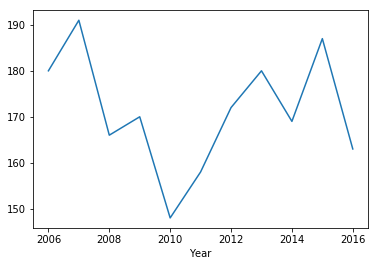

In [53]:
yearMov['Runtime (Minutes)'].max().plot.line()

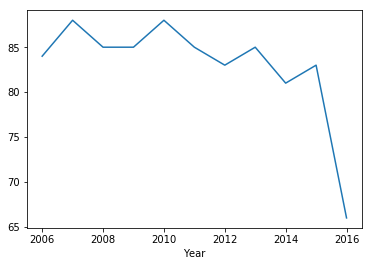

In [54]:
yearMov['Runtime (Minutes)'].min().plot.line()

# <span style="color:red">Conclusion</span>

This data set gives us information about 1000 movies released in between 2006 - 2016.
-Most of the movies are rated between 6 to 8 on a scale of 10.

There are 20 genres available all total in the data.
-Drama, Action, Comedy, Adventure and Thriller are the top 5 genre where most number of movies are made. Where as, Sports, Music, War, Western and Musical are the least popular genre w.r.to movies made.

-Adventure, Action, Drama, Comedy, Thriller, Sci-fi type of movies generate more revenues and hence those movies are produced in a greater number each year. 
As usual Sports, Music, War, Western and Musical generate least revenue.

-Drama tops the chart in terms of rating, followed by Action/Comedy/Adventure/Thriller. So these popular genre movies are produced more every year, liked by most number of people and generate more revenue. Action genre is successful in all the three categories - rating, votes and revenue. (Overall)

-Metascore and Rating has a highly positive correlation.

-Surprisingly, revenue and rating does not have any correlation, which means a critically acclaimed movie might not generate high revenue and vice versa.

-Number of movie produced is getting increased every year. From 2006 till 2012 it was a steady number (50 and a bit above), 2013 onwards the numbers are increased drastically. But there is a sudden jump in movie numbers from 2015 to 2016 (almost double). Probably it indicates the website is getting popular and more movie data is getting recorded 2013 onwards.

-Chris Pratt, Noomi Rapace, James McAvoy,Adam G. Sevani,Shannon Woodward,Cheryl Hines are the top actors w.r.to number of movies acted in. This sequence changes if we try to figure out most successful actors w.r.to box office (revenue earned by movies) and they are Robert Downey Jr., Jennifer Lawrence, Christian Bale, Josh Hutcherson, Will Smith. Most probably these box office kings are more expensive than others, that’s the reason for a bit lesser appearance in films than other top actors (movie wise).	

-2015 and 2016 has more number of rated movies

-Number of votes are increased every year, we can draw one inference from it that website is getting more popular every year.

-Ridley Scott, Paul W.S. Anderson, M. Night Shyamalan, Michael Bay, David Yates are the top directors w.r.to number of movie directed. This list changes if we consider revenue wise top director count and the list is J.J. Abrams, David Yates, Christopher Nolan, Michael Bay, Francis Lawrence. Interestingly, only Michael Bay seems to be the man who reserve his spot in both top 5 category, so he is a balanced and perfect director.

-Most of the average rated movies (6 to 8) have a runtime between 90 to 120

-It's a bit difficult to choose top 10 movies due to multiple deciding factor, so top movies can vary based on revenue, rating and votes. 
    - Star Wars: Episode VII - The Force Awakens, Avatar, Jurassic World, The Avengers, The Dark Knight are the top movies w.r.to revenue.
    -The Dark Knight, Inception, Dangal, Interstellar, Kimi no na wa are the top movies w.r.to rating. 
    -The Dark Knight, Inception, The Dark Knight Rises,Interstellar and The Avengers are the top movies w.r.to vote cast.
From this list one interesting fact comes out that director Christopher Nolan is the only director whose movie falls in top 5 in each of those 3 categories. Also, 4 of his movies are in top 5 w.r.to vote cast and 3 of his movies are in top 5 w.r.to rating. So he is definitely one of the most popular director who produce critically acclaimed successful movies.
We also observe that several (Dangal, Kimi no na wa, The Intouchables, Whiplash, The Prestige, Taare Zameen Par) highly rated movies failed to earn good revenue in box office, but most of them are not Hollywood movies. Every box office hit movies have a rating greater than 6 atleast.

-Average rating drops down w.r.to years, but the number of movies are increasing every year the total rating per year is increasing.

-Average revenue also drops down w.r.to years, although sum of the revenue increasing every year due to higher movie count. 2016 is the year where revenue collected by a movie reaches highest number.

-Average runtime drops down w.r.to years, which indicates that directors/viewers feel more connected to shorter movies.